In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.rcParams['figure.figsize'] = (20, 10)
pd.set_option('display.max_columns', None)

In [2]:
np.random.seed(0)

In [9]:
# Problema inicial, no sabemos si es un csv...
# cat device_failure.csv | head no muestra problemas
# no sabemos el encoding, usamos latin-1 como primer intento

In [7]:
devices = pd.read_csv("device_failure.csv", encoding='Latin-1')

In [8]:
devices.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [10]:
devices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [14]:
devices.failure.value_counts(normalize=True)

0    0.999149
1    0.000851
Name: failure, dtype: float64

In [15]:
devices["date"]=pd.to_datetime(devices["date"])

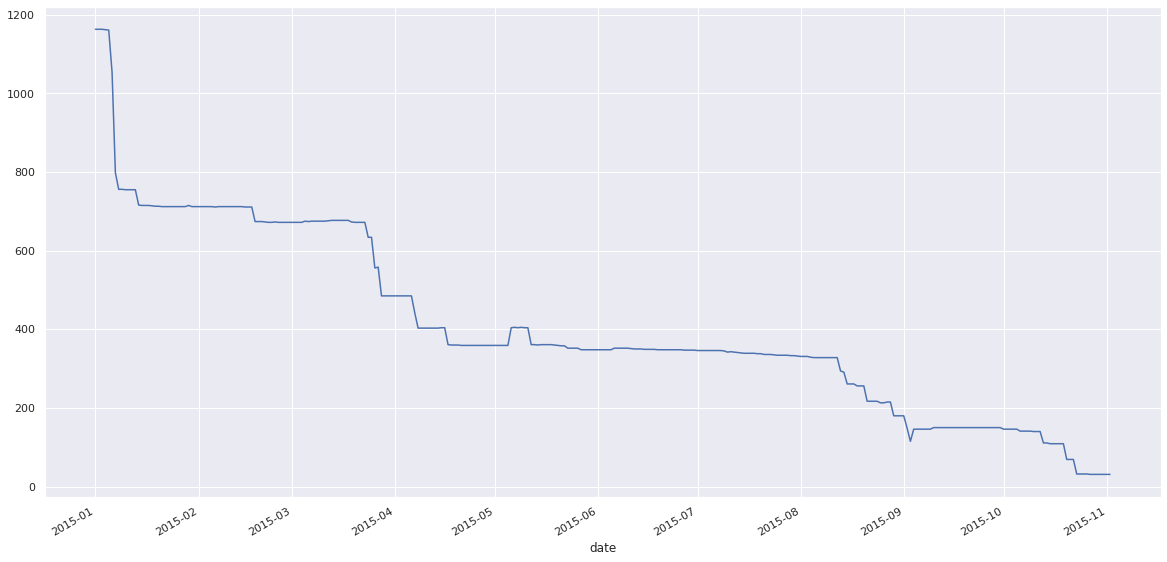

In [25]:
devices.groupby(["date"])["device"].nunique().plot()

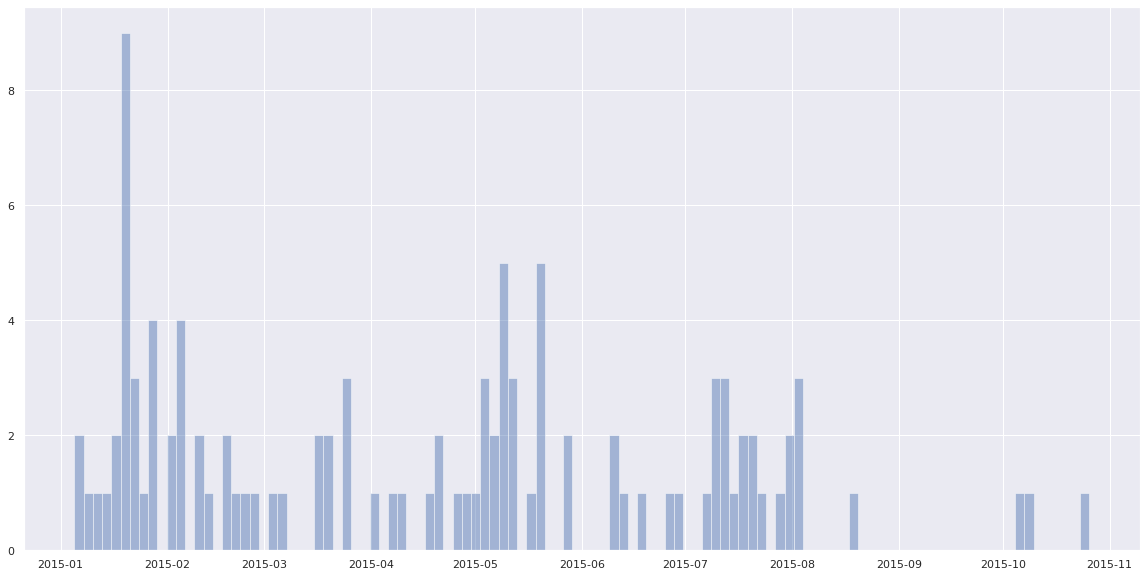

In [35]:
devices.query("(failure == 1)").date.hist(bins = 110, alpha = 0.45)

In [23]:
devices.groupby(["device"])["date"].count().describe()

count    1169.000000
mean      106.496151
std       102.651601
min         1.000000
25%         6.000000
50%        84.000000
75%       224.000000
max       304.000000
Name: date, dtype: float64

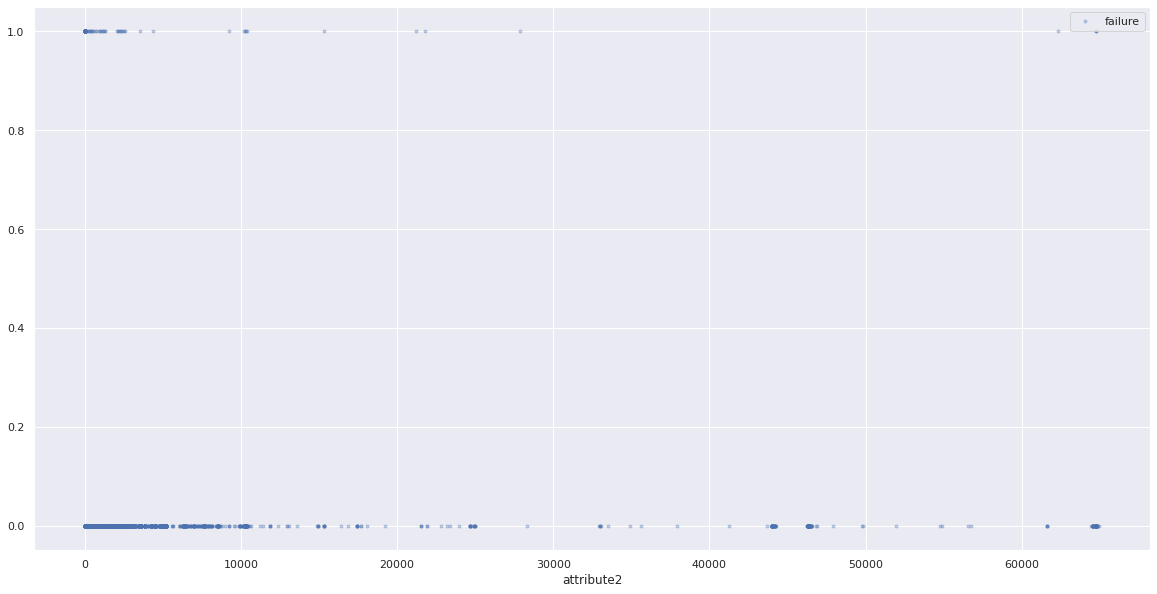

In [37]:
devices.plot(x = 'attribute2', y = 'failure', style = '.', alpha = 0.3)

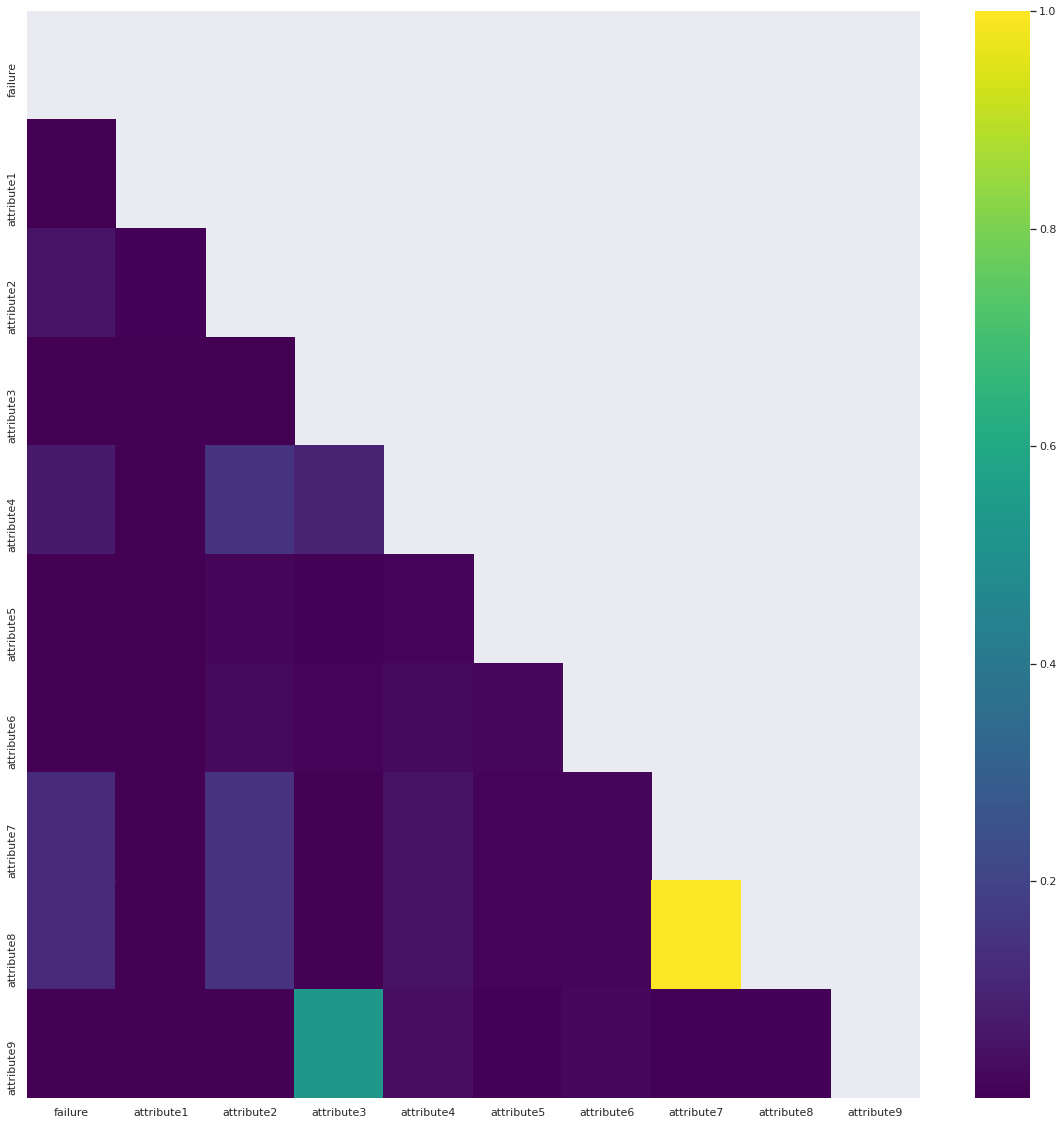

In [38]:
plt.figure(figsize=(20, 20))
corr = devices.corr() 
mask = np.tri(*corr.shape).T 
sns.heatmap(corr.abs(), mask=mask, annot=False, cmap='viridis');

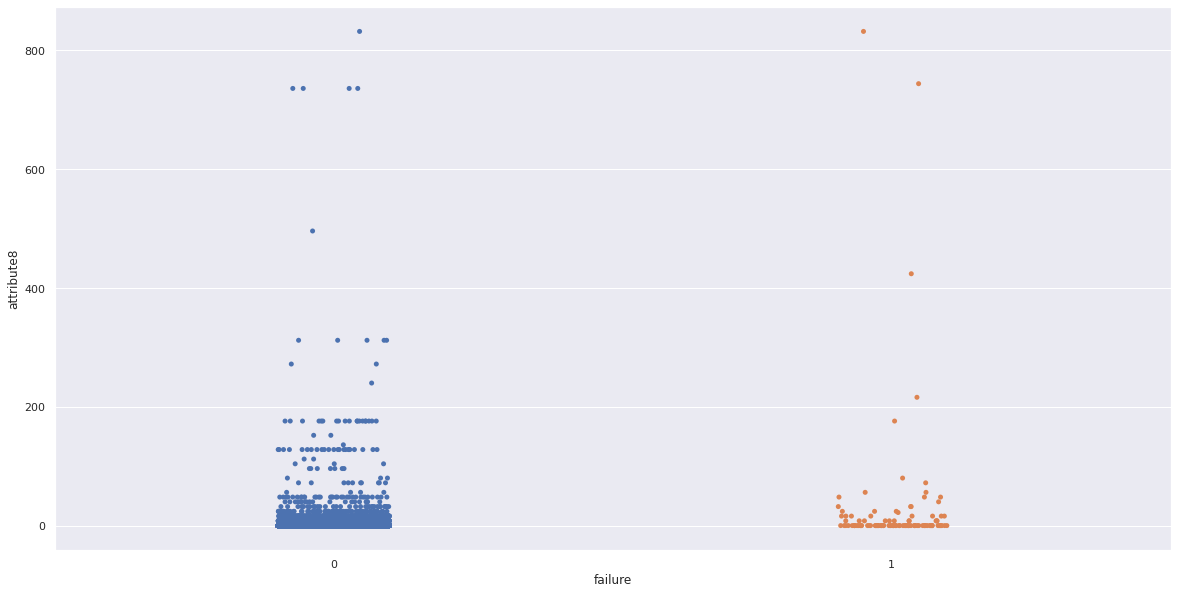

In [42]:
sns.stripplot(x="failure", y="attribute8", data=devices, jitter=True)
plt.show();

In [40]:
devices.corr()['failure'].sort_values(ascending=False)

failure       1.000000
attribute8    0.119055
attribute7    0.119055
attribute4    0.067398
attribute2    0.052902
attribute5    0.002270
attribute1    0.001983
attribute9    0.001622
attribute6   -0.000550
attribute3   -0.000948
Name: failure, dtype: float64

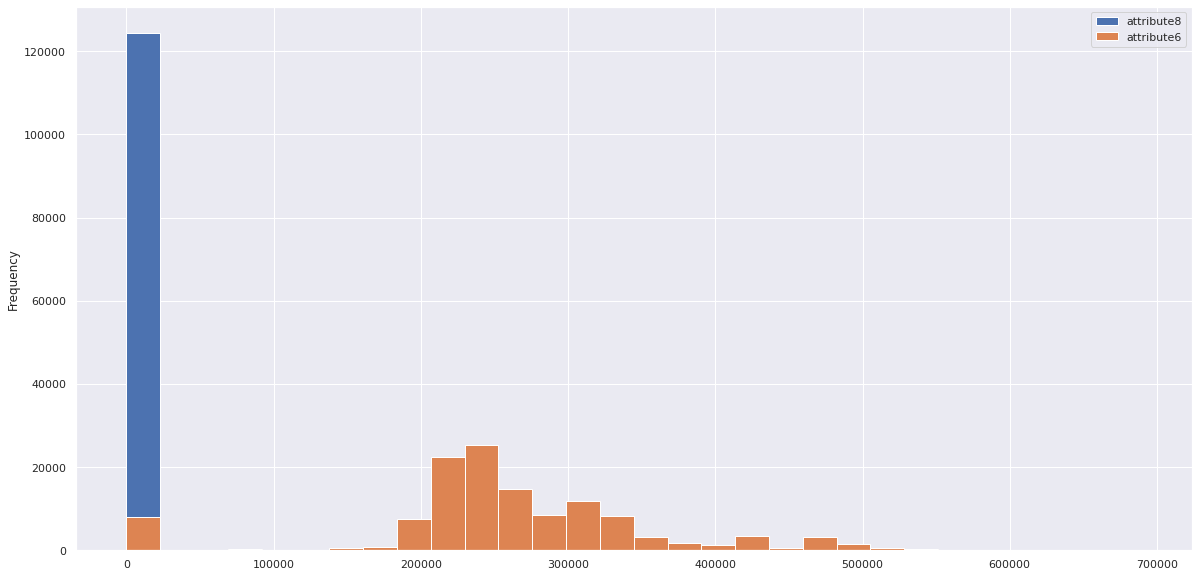

In [44]:
devices[["attribute8", "attribute6"]].plot(bins=30, kind="hist")